<h1><center>CMPE 462 - Project 2<br>Implementing an SVM Classifier<br>Due: May 18, 2020, 23:59</center></h1>

* **Student ID1: 2015400069**
* **Student ID2: 2015400177**
* **Student ID3: 2019700087**

## Overview

In this project, you are going to implement SVM. For this purpose, a data set (data.mat) is given to you. You can load the mat dataset into Python using the function `loadmat` in `Scipy.io`. When you load the data, you will obtain a dictionary object, where `X` stores the data matrix and `Y` stores the labels. You can use the first 150 samples for training and the rest for testing. In this project, you will use the software package [`LIBSVM`](http://www.csie.ntu.edu.tw/~cjlin/libsvm/) to implement SVM. Note that `LIBSVM` has a [`Python interface`](https://github.com/cjlin1/libsvm/tree/master/python), so you can call the SVM functions in Python. 

In [0]:
pip install libsvm

     |████████████████████████████████| 174kB 2.7MB/s 
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp36-cp36m-linux_x86_64.whl size=233322 sha256=fded4d04b76fd3e545172dc0f77944fcb5bd6e23e9dc2b9dbe1459389e55421e
  Stored in directory: /root/.cache/pip/wheels/5e/9e/b5/dbb033107407eec2f52b8cd24cf024a4b9ec8b62ea5aee995a
Successfully built libsvm


In [0]:
import scipy.io as sc
from libsvm.svmutil import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from cvxopt import matrix, solvers
solvers.options['show_progress'] = False

In [0]:
def split_train_test(features, target):
  X_train, y_train = features[:150], target[:150].reshape(-1)
  X_test, y_test = features[150:], target[150:].reshape(-1)
  return X_train, y_train, X_test, y_test

data = sc.loadmat('data.mat')
X, y = data['X'], data['Y']

X_train, y_train, X_test, y_test = split_train_test(X, y)

## Task 1 - 30 pts

Train a hard margin linear SVM and report both train and test classification accuracy.

In [0]:
def construct_model(train_target, train_features, kernel_type, c_value):
  return svm_train(train_target, train_features, '-c {} -t {}'.format(c_value, kernel_type))

def predict(model, test_target, test_features):
  p_label, p_acc, p_val = svm_predict(test_target, test_features, model)
  return p_acc[0]

In [0]:
model = construct_model(y_train, X_train, 0, 10000000000)

print('Training set')
training_accuracy = predict(model, y_train, X_train)
print('Training accuracy = ', training_accuracy)

print('\n --------- \n')

print('Test set')
test_accuracy = predict(model, y_test, X_test)
print('Test accuracy = ', test_accuracy)

Training set
Accuracy = 74.6667% (112/150) (classification)
Training accuracy =  74.66666666666667

 --------- 

Test set
Accuracy = 77.5% (93/120) (classification)
Test accuracy =  77.5


## Task 2 - 40 pts

Train soft margin SVM for different values of the parameter $C$, and with different kernel functions. Systematically report your results. For instance, report the performances of different kernels for a fixed $C$, then report the performance for different $C$ values for a fixed kernel, and so on.

Executing for different kernels for a fixed C = 1 

Train values
Executing for kernel = Linear, C = 1
Accuracy = 86.6667% (130/150) (classification)
Executing for kernel = Polynomial, C = 1
Accuracy = 86% (129/150) (classification)
Executing for kernel = Radial Basis, C = 1
Accuracy = 86.6667% (130/150) (classification)
Executing for kernel = Sigmoid, C = 1
Accuracy = 82.6667% (124/150) (classification)

 --------- 

Test values
Executing for kernel = Linear, C = 1
Accuracy = 85% (102/120) (classification)
Executing for kernel = Polynomial, C = 1
Accuracy = 82.5% (99/120) (classification)
Executing for kernel = Radial Basis, C = 1
Accuracy = 84.1667% (101/120) (classification)
Executing for kernel = Sigmoid, C = 1
Accuracy = 84.1667% (101/120) (classification)


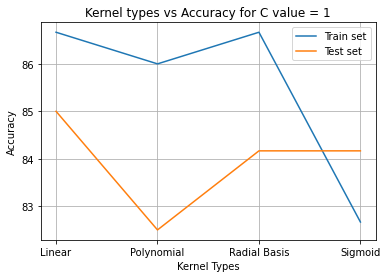


 --------- 

Executing for different C values for a fixed kernel type = Radial Basis 

Train values
Executing for kernel = Radial Basis, C = 1
Accuracy = 86.6667% (130/150) (classification)
Executing for kernel = Radial Basis, C = 10
Accuracy = 95.3333% (143/150) (classification)
Executing for kernel = Radial Basis, C = 25
Accuracy = 97.3333% (146/150) (classification)
Executing for kernel = Radial Basis, C = 50
Accuracy = 98% (147/150) (classification)
Executing for kernel = Radial Basis, C = 75
Accuracy = 98.6667% (148/150) (classification)
Executing for kernel = Radial Basis, C = 100
Accuracy = 99.3333% (149/150) (classification)

 --------- 

Test values
Executing for kernel = Radial Basis, C = 1
Accuracy = 84.1667% (101/120) (classification)
Executing for kernel = Radial Basis, C = 10
Accuracy = 77.5% (93/120) (classification)
Executing for kernel = Radial Basis, C = 25
Accuracy = 78.3333% (94/120) (classification)
Executing for kernel = Radial Basis, C = 50
Accuracy = 77.5% (93/

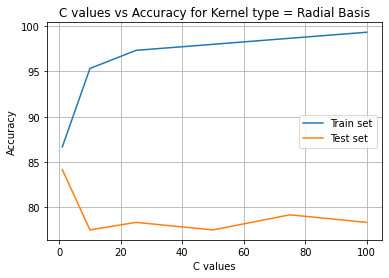

In [0]:
def execute(train_target, train_features, test_target, test_features, kernel_types, c_values, log = True):
  accuracies = []
  number_of_vectors = []
  for kernel_type, c_value in zip(kernel_types, c_values):
    if log:
      print('Executing for kernel = {}, C = {}'.format(kernel_dict.get(str(kernel_type)), c_value))
    m = construct_model(train_target, train_features, str(kernel_type), str(c_value))
    accuracy = predict(m, test_target, test_features)
    accuracies.append(accuracy)
    number_of_vectors.append(m.get_nr_sv())    

  return accuracies, number_of_vectors

kernel_dict = {'0': 'Linear', '1': 'Polynomial', '2': 'Radial Basis', '3': 'Sigmoid'}

print('Executing for different kernels for a fixed C = {} \n'.format(1))
print('Train values')
train_accuracies_different_kernel, number_of_vectors = execute(y_train, X_train, y_train, X_train, [0, 1, 2, 3], [1, 1, 1, 1])

print('\n --------- \n')

print('Test values')
test_accuracies_different_kernel, number_of_vectors = execute(y_train, X_train, y_test, X_test, [0, 1, 2, 3], [1, 1, 1, 1])

fig, ax = plt.subplots()
ax.plot([kernel_dict.get('0'), kernel_dict.get('1'), kernel_dict.get('2'), kernel_dict.get('3')], train_accuracies_different_kernel, label = 'Train set')
ax.plot([kernel_dict.get('0'), kernel_dict.get('1'), kernel_dict.get('2'), kernel_dict.get('3')], test_accuracies_different_kernel, label = 'Test set')

ax.set(xlabel='Kernel Types', ylabel='Accuracy',
       title='Kernel types vs Accuracy for C value = {}'.format(1))
ax.grid()
ax.legend()

plt.show()

print('\n --------- \n')

print('Executing for different C values for a fixed kernel type = {} \n'.format(kernel_dict.get('2')))
print('Train values')
train_accuracies_different_c, number_of_vectors = execute(y_train, X_train, y_train, X_train, [2, 2, 2, 2, 2, 2], [1, 10, 25, 50, 75, 100])

print('\n --------- \n')

print('Test values')
test_accuracies_different_c, number_of_vectors = execute(y_train, X_train, y_test, X_test, [2, 2, 2, 2, 2, 2], [1, 10, 25, 50, 75, 100])

fig, ax = plt.subplots()
ax.plot([1, 10, 25, 50, 75, 100], train_accuracies_different_c, label = 'Train set')
ax.plot([1, 10, 25, 50, 75, 100], test_accuracies_different_c, label = 'Test set')

ax.set(xlabel='C values', ylabel='Accuracy',
       title='C values vs Accuracy for Kernel type = {}'.format(kernel_dict.get('2')))
ax.grid()
ax.legend()


## Task 3 - 15 pts

Please report how the number of support vectors changes as the value of $C$ increases (while all other parameters remain the same). Discuss whether your observations match the theory.

Accuracy = 85% (102/120) (classification)
Accuracy = 81.6667% (98/120) (classification)
Accuracy = 81.6667% (98/120) (classification)
Accuracy = 81.6667% (98/120) (classification)
Accuracy = 81.6667% (98/120) (classification)


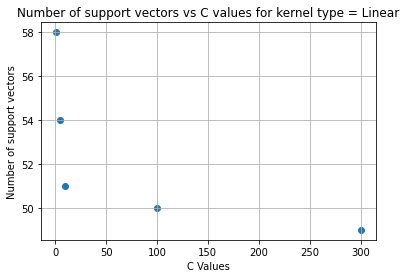

[58, 54, 51, 50, 49]


In [0]:
kernels = [0, 0, 0, 0, 0]
c_values = [1, 5, 10, 100, 300]
accuracies, num_vectors = execute(y_train, X_train, y_test, X_test, kernels, c_values, log = False)

fig, ax = plt.subplots()
ax.scatter(c_values, num_vectors)

ax.set(xlabel='C Values', ylabel='Number of support vectors',
       title='Number of support vectors vs C values for kernel type = {}'.format(kernel_dict.get('0')))
ax.grid()

plt.show()

print(num_vectors)

## Task 4 - 15 pts

Please investigate the changes in the hyperplane when you remove one of the support vectors, vs., one data point that is not a support vector.

#### *If a data point is not a support vector, removing it has no effect on the model.On the other hand, deleting the support vectors will then change the position of the hyperplane.*

In [0]:
model = construct_model(y_train, X_train, 0, 1)
sv_indices = np.int_(np.array(model.get_sv_indices() - np.ones(len(model.get_sv_indices()))))
non_sv_indices = np.setxor1d(np.array(range(X_train.shape[0])), sv_indices)

sv_coef = model.get_sv_coef()
w = np.matmul(np.array(X_train)[sv_indices].T, sv_coef)
b = -model.rho.contents.value

print("W: ", w.ravel())
print("Norm of W: ", sum(w**2)**0.5)
print("b: ", b)
print("# of SV: ", model.get_nr_sv())

W:  [-0.47637751  0.39813231  0.86713369  0.57366213  0.32304567  0.10008082
  0.05139059 -0.95512925  0.07086555  0.00576303  0.24894908  1.82218655
  0.5129991 ]
Norm of W:  [2.4791741]
b:  1.1847368158140863
# of SV:  58


In [0]:
for i in [sv_indices[0], non_sv_indices[0]]:
  X_ = np.delete(X_train, i, axis=0)
  y_ = np.delete(y_train, i, axis=0)
  model = construct_model(y_, X_, 0, 1)
  w = np.matmul(np.array(X_)[np.int_(np.array(model.get_sv_indices() - np.ones(len(model.get_sv_indices()))))].T, model.get_sv_coef())
  b = -model.rho.contents.value

  print("W: ", w.ravel())
  print("Norm of W: ", sum(w**2)**0.5)
  print("b: ", b)
  print("# of SV: ", model.get_nr_sv())
  print("\n")

W:  [-0.66183675  0.36149846  0.93849842  0.57538557  0.36977623  0.10905087
  0.07963851 -0.98344676  0.02084041  0.09060237  0.23487472  1.9661612
  0.51400789]
Norm of W:  [2.66392501]
b:  1.3115309595573938
# of SV:  56


W:  [-0.47637751  0.39813231  0.86713369  0.57366213  0.32304567  0.10008082
  0.05139059 -0.95512925  0.07086555  0.00576303  0.24894908  1.82218655
  0.5129991 ]
Norm of W:  [2.4791741]
b:  1.184736815814086
# of SV:  58




### Bonus Task - 10 pts

Use Python and [CVXOPT](http://cvxopt.org) QP solver to implement the hard margin SVM. 

In [0]:
class HardMarginSVM():
    def fit(self, X, y):
        m, n = X.shape

        self.P = matrix(np.identity(n + 1, dtype=np.float)) #Q
        self.q = matrix(np.zeros((n + 1,), dtype=np.float)) #p
        self.G = matrix(np.zeros((m, n + 1), dtype=np.float)) #A
        self.h = matrix(-1 * np.ones((m, ), dtype=np.float)) #c

        self.P[0, 0] = 0 # Set the [0,0] as 0 as shown in the slides

        for i in range(m):
          self.G[i, 0] = float(-y[i])
          for j in range(n):
            self.G[i, j + 1] = float(-y[i] * X[i, j])  

        sol = solvers.qp(self.P, self.q, self.G, self.h)

        self.w = np.zeros(n,) 
        self.b = sol["x"][0] #bias is the first element of u*
        for i in range(1, n + 1):
            self.w[i - 1] = sol["x"][i] #u* except the first element corresponds to w
        
        return self.w, self.b

    def predict(self, X):
        return np.sign(np.dot(self.w, X.T) + self.b) # g(x) = sign(X^T * w + b)

In [0]:
X = np.column_stack(([0,2,2,3],[0,2,0,0]))
y = np.array([-1,-1,1,1])

model = HardMarginSVM()
model.fit(X, y)
predictions = model.predict(X)
print('Accuracy = ', 100 * accuracy_score(y,predictions))

Accuracy =  100.0


In [0]:
model.w

array([ 1.00000001, -1.00000001])

In [0]:
model.b

-1.0000000134075104